### CUSTOMER CHURN EM EMPRESAS DE SEGUROS DE AUTOMÓVEL - 03/2020
### MARCIO DE LIMA

Trabalho de Conclusão de Curso para a obtenção do tı́tulo de Especialista em Big Data, Data Science e
Data Analytics, pelo curso de Pós-Graduação Lato Sensu em Big data, Data science e Data Analytics da
Universidade do Vale do Rio dos Sinos – UNISINOS.
Orientadora: Prof. Dra. Josiane B. Porto


## Dicionário de Dados

### O DataSet contém 48 colunas / variáveis. 
### Cada variável possui uma descrição relacionada ao negócio e possuem valores / códigos 
### relacionados ao seu significado.  

### Variável => Tipo => Valores / Domínios => Descrição

anosFidelidadeCliente => Variável numérica => Representa quantos anos o cliente está na CIA. 

codigoEstadoCivil => Variável Categória numérica, representada por código / domínios (1 - Solteiro, 2 - Casado, 3 - Viúvo, 4 - Separado judicialmente, 5 - Divorciado). Representa o estado civil do Segurado. 

sexoSegurado => Variável Categória numérica, representada por código / domínios (0 - masculino, 1 - Feminino). Representa o sexo do Segurado. 

tipoPessoaSegurado => Variável Categória numérica, representada por código / domínios (0 - Juridica, 1 - Fisica). Representa se o segurado é pessoa física ou pessoa jurídica (empresa). 

resgatePontos => Variável Categória numérica, representada por código / domínios (0 - Não resgatou, 1 - resgatou). Flag que informa se o segurado utilizou seus pontos do cartão de crédito para a renovação do seguro. 

numeroSegmentoCliente => Variável Categória numérica, representada por código / domínios (1 - Tradicional, 2 - Auto-Premium). Representa a classificação do cliente na CIA. 

codigoCategoriaTarifaria => Variável Categória numérica, representada por código / domínios (10 - Passeio, 11 - Importado, 30 - Moto, 80 - taxi, etc.) São dezenas de códigos que representam uma categoria do veículo.  

quantidadePortasVeiculo => Variável numérica => Representa a quantidade de portas do veiculo (2, 3 4 ou 5 portas). 

codigoCombustivelVeiculo => Variável Categória numérica, representada por código / domínios (8 - Gasolina, 9 - Alcool, 10 - Flex, 11 - Diesel, 12 - Gas). Representa o tipo do combustivel do veículo. 

codigoUsoVeiculo => Variável Categória numérica, representada por código / domínios (1 - Particular, 2 - Comercial). Representa o uso que o segurado faz do veículo. 

codigoFamiliaVeiculo => Variável Categória numérica, representada por código / domínios (1 - Veiculos Leves, 2 - Veiculos pesados, 3 - Vans e onibus, etc.). Representa um agrupamento de categorias de veiculo.

especieVeiculo => Variável Categória numérica, representada por código / domínios (1 - Passageiro, 2 - Carga, 3 - Especial, etc.). Representa a espécie do veiculo.

codigoTipoVeiculo => Variável Categória numérica, representada por código / domínios (1 - SUV, 2 - Hatch, 3 - Sedan, etc.). Representa o tipo do veiculo. 

codigoMarcaVeiculo => Variável Categória numérica, representada por código / domínios (1 - VW, 2 - Fiat, 3 - Chevrolet, 4 - Nissan, 5 - Pegueot, etc.). Representa o fabricante do veiculo. 

numeroSegmentoDocumento => Variável Categória numérica, representada por código / domínios (1 - Premium, 2 - Auto-Jovem, 3 - Moto, 4 - Idoso, 5 - Caminhão, 6 - Mulher, 7 - Juridica). Representa a classificação da apólice na CIA.

codigoSucursal => Variável Categória numérica, representada por código / domínios (1 - Sucursal Centro SP, 2 - Sucursal Rio de Janeiro, 3 - Sucursal São Miguel Pta SP, 4 - Sucursal Campinas SP, etc.). Representa um ID para cada sucursal (unidade de atendimento da CIA para segurados e corretores) nas cidades brasileiras. 

premioLiquidoPagoApolice => Variável numérica => Representa o valor em reais do valor pago para a contratação da apólice anterior. Apólice antiga. 

valorFranquia => Variável numérica => Representa o valor em reais da franquia do veículo.  

valorPremioFinal  => Variável numérica => Representa o valor em reais da apólice a ser contratada. 

valorDiferencaPremioAnual => Variável numérica => Representa o valor em reais do prêmio anual dividido pelo valor do prêmio anterior pago pelo segurado.

quantidadeUtilizacaoEstapar => Variável numérica => Representa a quantidade de uso do serviço da Estapar efetuados pelo segurado no período. 

codigoClasseLocalizacao => Variável Categória numérica, representada por código / domínios (10 - Zona Leste de São Paulo, 11 - Centro de São Paulo, 2 - Rio de Janeiro, etc.). São dezenas de códigos que representam macro-região dos estados brasileiros. 

origemProposta => Variável Categória numérica, representada por código / domínios (20 - Online, 12 - Renovação, 1 - Legado). Representa o sistema de origem da proposta de renovação. 

codigoAgravamentoPremio => Variável Categória numérica, representada por código / domínios (0 - Sem Agravo, 22 - Agravo de 5%, 2 - Agravo de 10%, etc.). Representa se houve um aumento do preço devido há alguma questão.  

quantidadeParcelas => Variável numérica => Representa a quantidade de parcelas que a apólice anterior foi paga. 

quantidadeSinistroAuto => Variável numérica => Representa a quantidade de sinistros de automóvel (roubo/furto ou colisão) que o veículo teve no período de 5 anos. 

quantidadeTotalSinistros => Variável numérica => Representa a quantidade total de sinistros de qualquer espécie que o veículo teve no período de 5 anos. 

codigoClasseBonus => Variável numérica => Representa a classe de bônus da apólice. A cada renovação, a classe aumenta. 

codigoFormaPagamento => Variável Categória numérica, representada por código / domínios (52 - Boleto, 97 - Cartão, etc.). Representa a forma de pagamento da apólice anterior.  

Mes => Variável numérica => Representa o mês da renovação. 

diaSemana => Variável numérica => Representa o dia da Semana da renovação. 

estacaoAno => Variável Categória numérica, representada por código / domínios (1 - Verão, 2 - Outono, 3 - Inverno, 4 - Primavera). Representa a estação do ano da renovação. 

codigoIBGEUF => Variável Categória numérica, representada por código / domínios (11-RO, 12-AC, 13-AM, 14-RR, 15-PA, 16-AP, 17-TO, 21-MA, 22-PI, 23-CE, 24-RN, 25-PB, 26-PE, 27-AL, 28-SE, 29-BA, 31-MG, 32-ES, 33-RJ, 35-SP, 41-PR, 42-SC, 43-RS, 50-MS, 51-MT, 52-GO, 53-DF). Representa a UF de acordo com o IBGE. 

IDHM => Variável numérica => Índice de Desenvolvimento Humano Municipal. Média geométrica dos índices das dimensões Renda, Educação e Longevidade, com pesos iguais. Referente a UF da apólice.

IDHM_E => Variável numérica => Índice de Desenvolvimento Humano Municipal - Dimensão Educação. Referente a UF da apólice.

IDHM_L => Variável numérica => Índice de Desenvolvimento Humano Municipal  - Dimensão Longevidade da UF. Referente a UF da apólice.

IDHM_R => Variável numérica => Índice de Desenvolvimento Humano Municipal - Dimensão Renda da UF. Referente a UF da apólice.

I_ESCOLARIDADE => Variável numérica => Subíndice de escolaridade fundamental da população adulta - IDHM Educação da UF. Referente a UF da apólice.

valorPremioPagoAtual => Variável numérica => Representa o valor em reais do prêmio atual da apólice que vai renovar. 

correntista => Variável Categória numérica, representada por código / domínios (0-Nao, 1-Sim). Informa se o segurado é cliente Itaú.

faixaIdade => Variável Categória numérica, representada por código / domínios (1- De 18 a 24 anos, 2- De 25 a 60, 3- Acima de 60). Faixa de idade do segurado. 

faixaPrecoLiquido => Variável Categória numérica, representada por código / domínios (1- De 0 ao 1 quartil(25%), 2- Do 1 quartil(25%) a média, 3- Acima da média. Faixa de preços líquidos. 

faixaPrecoFranquia => Variável Categória numérica, representada por código / domínios (1- De 0 ao 1 quartil(25%), 2- Do 1 quartil(25%) a média, 3- Acima da média. Faixa de preços de franquia.  

faixaPrecoPremioFinal => Variável Categória numérica, representada por código / domínios (1- De 0 ao 1 quartil(25%), 2- Do 1 quartil(25%) a média, 3- Acima da média. Faixa de preços de prêmios finais.  

diferencaPremioAntNovo => Variável numérica => Representa o valor em reais do prêmio atual menos o prêmio anterior pago pelo segurado. Pode ser positivo ou negativo. 

faixaDiferencaValores => Variável Categória numérica, representada por código / domínios (1- De 0 ao 1 quartil(25%), 2- Do 1 quartil(25%) a média, 3- Acima da média. Faixa de preços da diferença entre os prêmios. 

renovou => Variável Categória numérica, representada por código / domínios (0-Apolice não-renovada (CHURN), 1-Apolice renovada). Nossa variável TARGET.

gerouSinistro => Variável Categória numérica, representada por código / domínios (0-Nao, 1-Sim). Flag de controle, caso exista qualquer sinistro na apólice durante o período de vigẽncia. 




## Importação

In [1]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#!pip install lightgbm
from lightgbm import LGBMClassifier

#!pip install xgboost
from xgboost import XGBClassifier

#!pip install joblib
from sklearn.externals import joblib




/home/marcio/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
#Carregando o dataset
df = pd.read_csv('dados/dataset_original.csv', sep=",")
df.head(10)

,anosFidelidadeCliente,codigoEstadoCivil,sexoSegurado,tipoPessoaSegurado,resgatePontos,numeroSegmentoCliente,codigoCategoriaTarifaria,quantidadePortasVeiculo,codigoCombustivelVeiculo,codigoUsoVeiculo,...,valorPremioPagoAtual,correntista,faixaIdade,faixaPrecoLiquido,faixaPrecoFranquia,faixaPrecoPremioFinal,diferencaPremioAntNovo,faixaDiferencaValores,renovou,gerouSinistro
0,11,2,1,1,1,1,10,5,8,1,...,2152.436533,1,2,3,2,1,-288.523467,1,0,0
1,11,2,1,1,0,1,10,5,8,1,...,2152.436533,1,3,2,3,3,386.676533,3,0,0
2,11,2,1,1,0,1,10,5,8,1,...,2152.436533,1,3,2,3,3,386.676533,3,0,0
3,12,2,0,1,0,1,10,5,8,1,...,2131.880000,1,3,3,1,3,59.540000,2,0,0
4,5,2,1,1,0,1,11,2,2,1,...,1495.110000,0,3,2,3,2,45.400000,2,0,0
5,3,1,0,1,0,1,30,0,8,1,...,1328.220000,0,2,2,2,2,-42.150000,2,0,0
6,1,1,1,1,0,1,14,3,8,1,...,2152.436533,0,3,2,2,1,561.556533,3,0,0
7,1,2,1,1,0,1,30,0,8,1,...,2152.436533,0,2,1,1,2,1092.336533,3,0,0
8,1,2,1,1,0,1,10,4,8,1,...,2152.436533,0,2,2,1,2,574.456533,3,0,0
9,2,2,0,1,0,1,22,5,8,1,...,8150.710000,0,2,3,3,3,4546.420000,3,0,0


# Análise Exploratória dos Dados

In [3]:
# Mostrando os dados
df.shape

(74570, 48)

In [4]:
# Mostrando as estruturas do Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74570 entries, 0 to 74569
Data columns (total 48 columns):
anosFidelidadeCliente          74570 non-null int64
codigoEstadoCivil              74570 non-null int64
sexoSegurado                   74570 non-null int64
tipoPessoaSegurado             74570 non-null int64
resgatePontos                  74570 non-null int64
numeroSegmentoCliente          74570 non-null int64
codigoCategoriaTarifaria       74570 non-null int64
quantidadePortasVeiculo        74570 non-null int64
codigoCombustivelVeiculo       74570 non-null int64
codigoUsoVeiculo               74570 non-null int64
codigoFamiliaVeiculo           74570 non-null int64
especieVeiculo                 74570 non-null int64
codigoTipoVeiculo              74570 non-null int64
codigoMarcaVeiculo             74570 non-null int64
numeroSegmentoDocumento        74570 non-null int64
codigoSucursal                 74570 non-null int64
premioLiquidoPagoApolice       74570 non-null float64
valor

In [5]:
# Dados Estatisticos - Analise descritiva das colunas Numéricas
# Arquivo com 48 colunas, todas numéricas, total de Registros: 74.570 linhas
# Variavel Target (renovou) possue 0 e 1, olhando a média já vemos que o dataset está balanceado. Veremos mais abaixo isso. 
# Possíveis outlier na coluna valorPremioPagoAtual e diferencaPremioAntNovo. 
# Desvio padrão quase o mesmo para todas as colunas. 

df.describe()

,anosFidelidadeCliente,codigoEstadoCivil,sexoSegurado,tipoPessoaSegurado,resgatePontos,numeroSegmentoCliente,codigoCategoriaTarifaria,quantidadePortasVeiculo,codigoCombustivelVeiculo,codigoUsoVeiculo,...,valorPremioPagoAtual,correntista,faixaIdade,faixaPrecoLiquido,faixaPrecoFranquia,faixaPrecoPremioFinal,diferencaPremioAntNovo,faixaDiferencaValores,renovou,gerouSinistro
count,74570.000000,74570.000000,74570.000000,74570.000000,74570.000000,74570.0,74570.000000,74570.000000,74570.000000,74570.000000,...,74570.000000,74570.000000,74570.000000,74570.000000,74570.000000,74570.000000,74570.000000,74570.000000,74570.000000,74570.000000
mean,5.275003,1.940445,0.418064,0.981816,0.269049,1.0,14.746560,4.042349,6.624326,1.063538,...,2260.690956,0.448974,2.276478,2.117661,2.111184,2.159970,163.627763,2.175298,0.499933,0.036985
std,5.062921,0.869902,0.493244,0.133618,0.443469,0.0,7.702437,1.559515,2.482504,1.137616,...,2627.574709,0.497393,0.470236,0.766156,0.770829,0.780438,2361.560243,0.819463,0.500003,0.188727
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,10.000000,0.000000,1.000000,1.000000,...,279.270000,0.000000,1.000000,1.000000,1.000000,1.000000,-32548.331070,1.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,1.000000,0.000000,1.0,10.000000,4.000000,8.000000,1.000000,...,1467.592500,0.000000,2.000000,2.000000,2.000000,2.000000,-135.392500,1.000000,0.000000,0.000000
50%,4.000000,2.000000,0.000000,1.000000,0.000000,1.0,10.000000,5.000000,8.000000,1.000000,...,2104.510000,0.000000,2.000000,2.000000,2.000000,2.000000,49.076904,2.000000,0.000000,0.000000
75%,7.000000,2.000000,1.000000,1.000000,1.000000,1.0,22.000000,5.000000,8.000000,1.000000,...,2315.072500,1.000000,3.000000,3.000000,3.000000,3.000000,424.855428,3.000000,1.000000,0.000000
max,24.000000,6.000000,1.000000,1.000000,1.000000,1.0,98.000000,5.000000,11.000000,30.000000,...,106166.360000,1.000000,3.000000,3.000000,3.000000,3.000000,97820.780000,3.000000,1.000000,1.000000


In [6]:
#Checando valores NA nos dados
df.isna().any()[lambda x: x]

Series([], dtype: bool)

In [7]:
#Checando valores Null nos dados
df.isnull().any()[lambda x: x]

Series([], dtype: bool)

### Comentário: Dados sem valores NA e sem valores NULL

In [8]:
# Distribuição da varíavel TARGET 
df.groupby('renovou').size()

renovou
0    37290
1    37280
dtype: int64

### Comentário: Balanceamento da variável Target OK. 50% dos dados  (37.290 clientes) que renovaram e 50% de dados (37.280 clientes) que não renovaram (Churn). 


## Gráficos

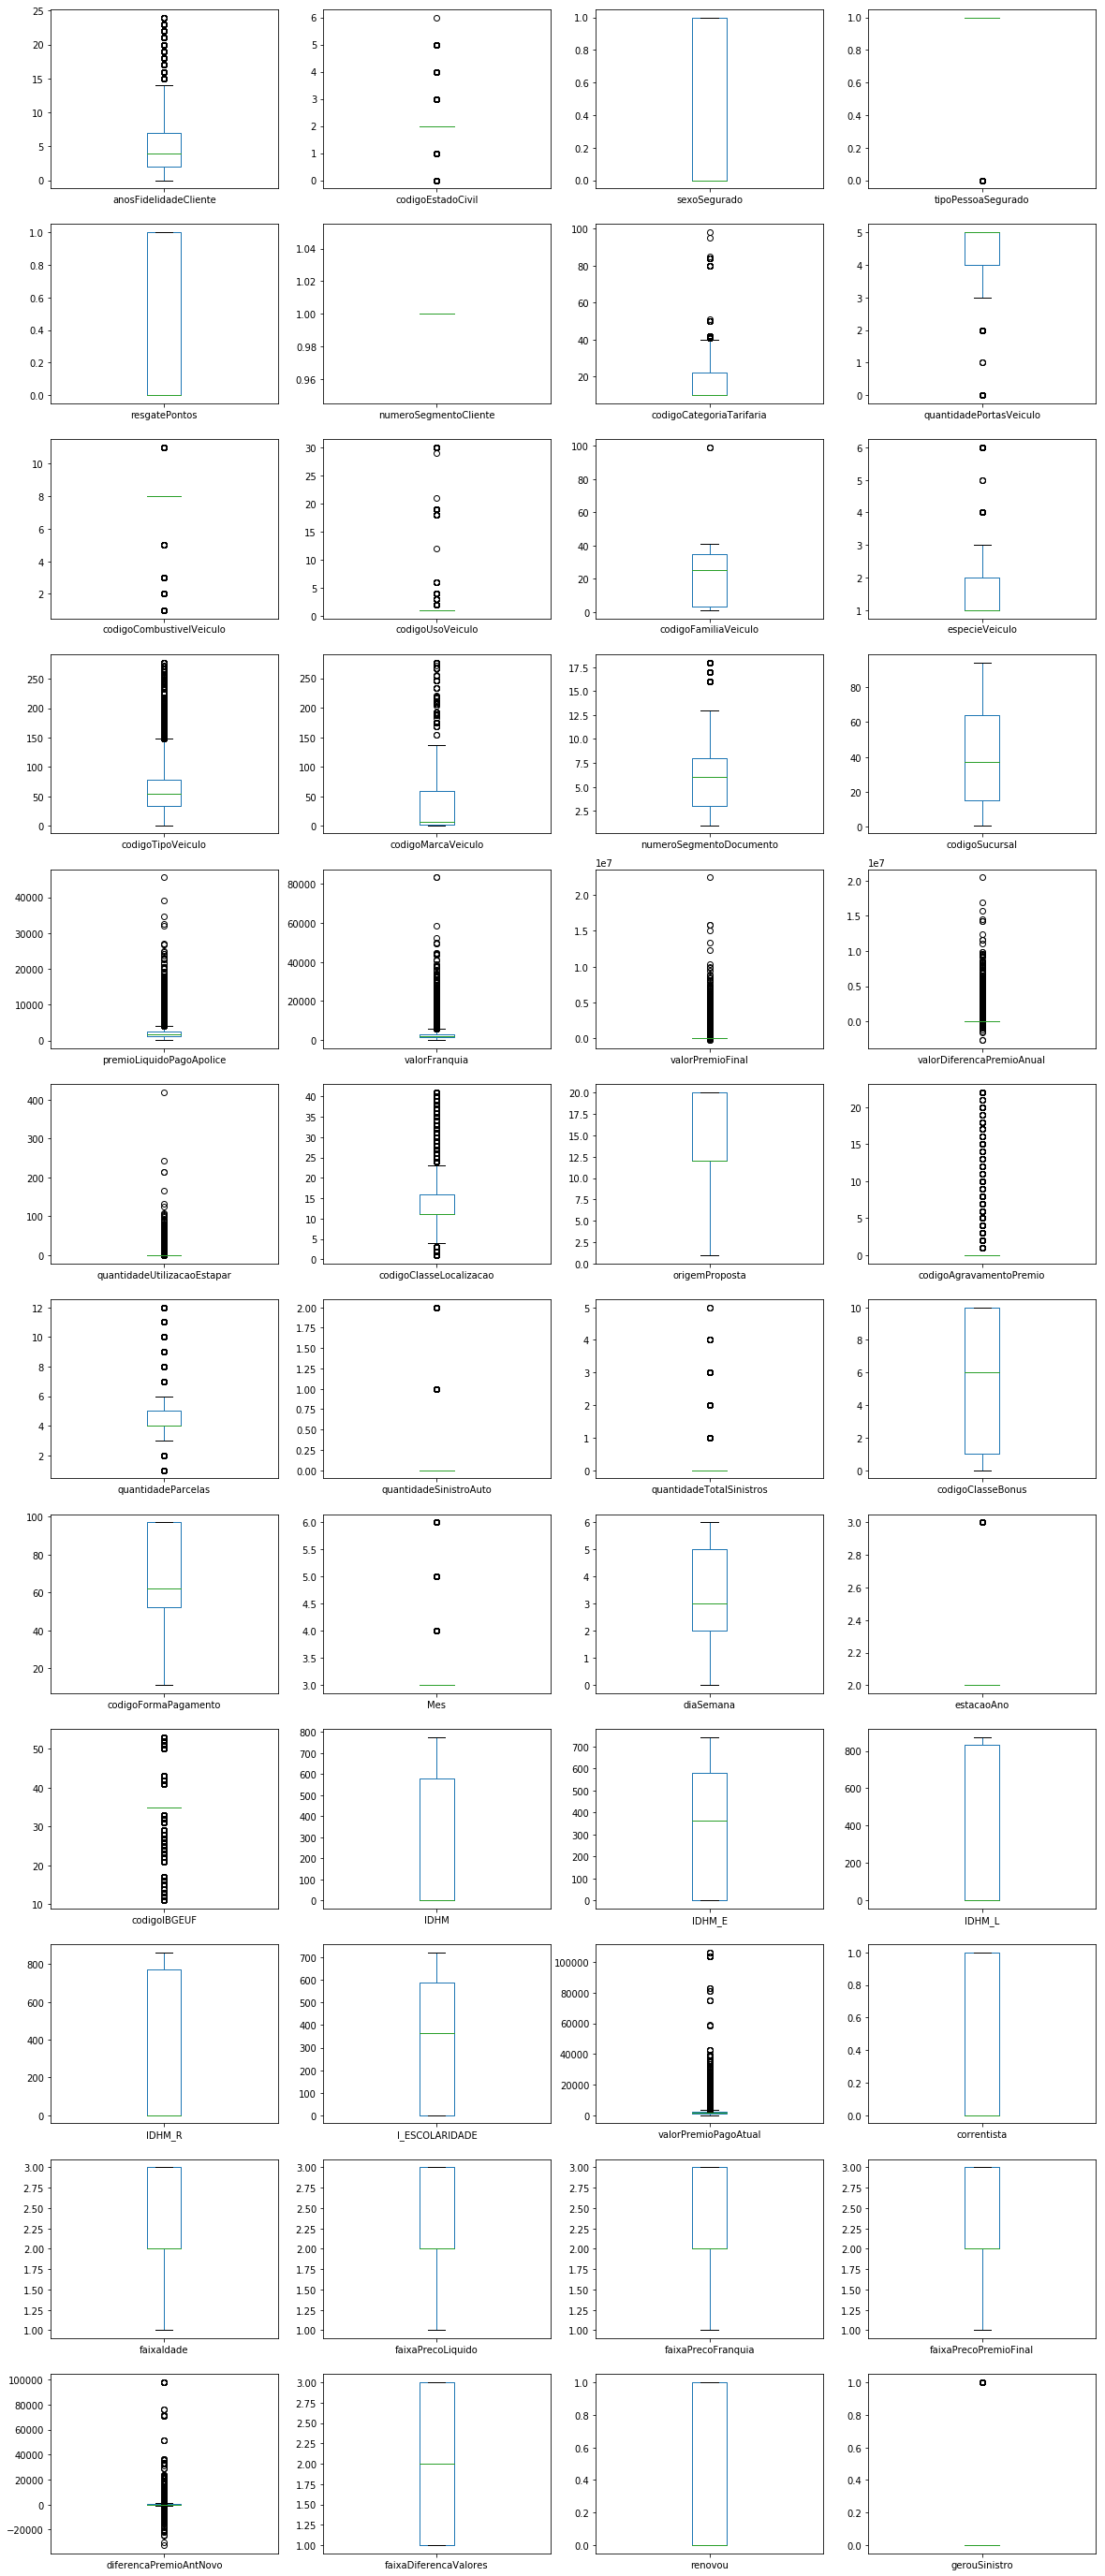

In [9]:
#Box-Plots
df.plot(kind = 'box', subplots = True, layout = (12,4), sharex = False, sharey = False, figsize=(20,50))
plt.show()

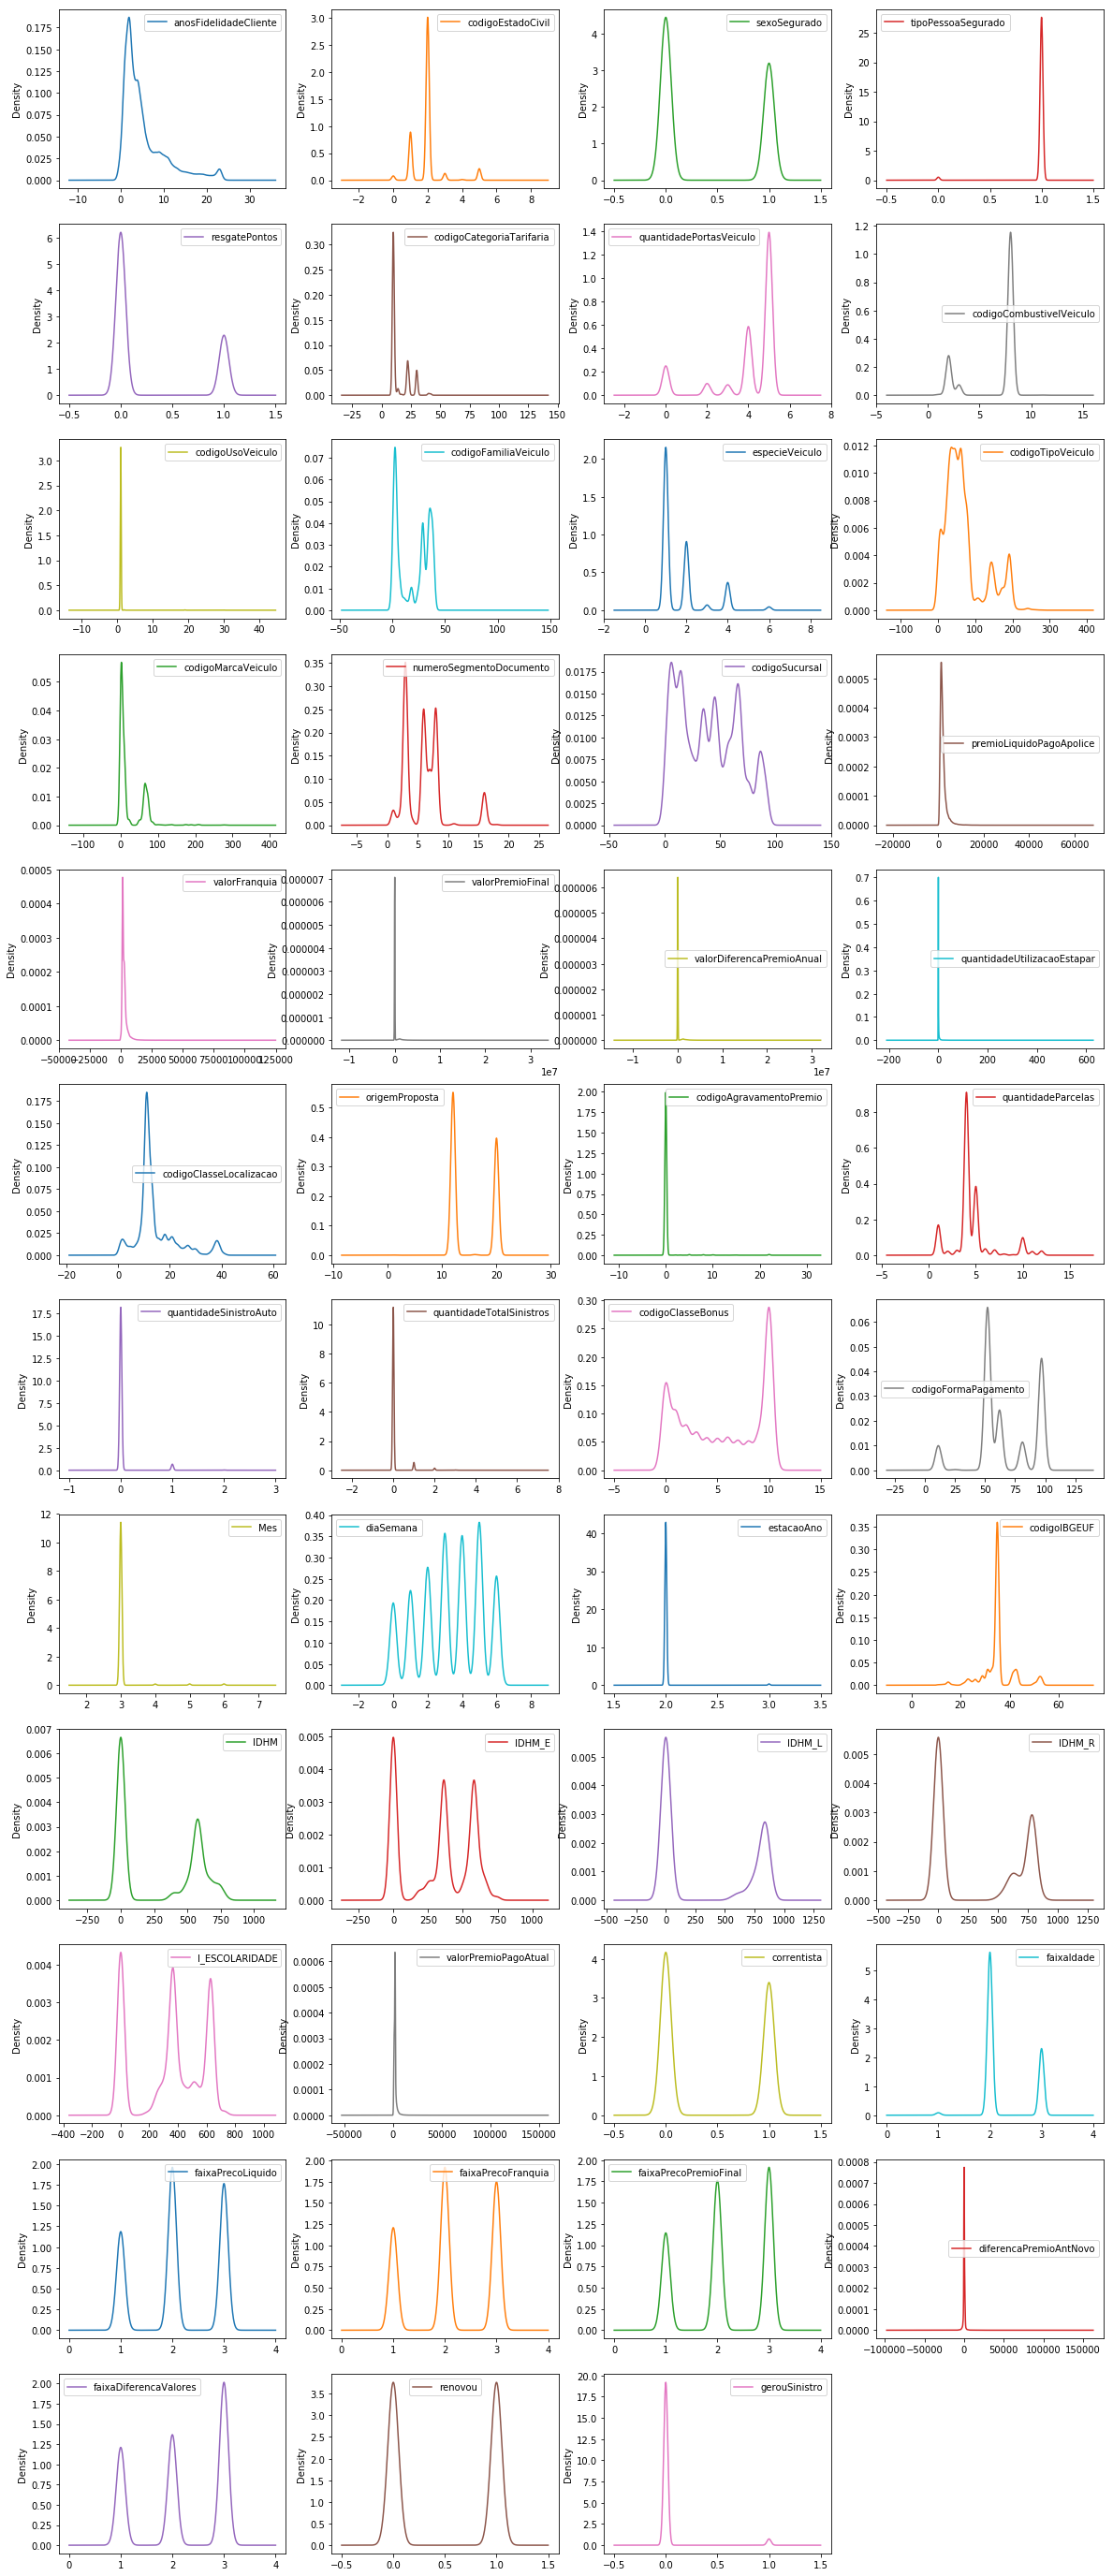

In [10]:
#Gráfico de Densidade - Retirado do gráfico a coluna - numeroSegmentoCliente
df.drop("numeroSegmentoCliente", axis=1).plot(kind = 'density', subplots = True, layout = (12,4), sharex = False, figsize=(20,50))
plt.show()

### Comentários: Analisando os gráficos acima podemos observar os seguintes pontos: 

1) numeroSegmentoCliente => 100% com valor 1, desta forma, sua importância para o modelo preditivo é baixa. Será retirado do dataset; O mesmo acontece com a coluna tipoPessoaSegurado e estacaoAno. 

2) Possível OutLiers nas variáveis valorPremioPagoAtual e diferencaPremioAntNovo;

3) Visualmente, algumas colunas possuem valores muito acima e abaixo da média, mas não são outliers pois seus valores condizem com o negócio. Vide dicionários de dados;

4) Grande parte das variáveis são categóricas (qualitativas), estão representadas por números devido a anonimação dos dados. Vide dicionários de dados;

5) Os dados estão em uma distribuição normal.



In [11]:
#Dados de Correlação entre as variáveis, multiplicado por 100 para melhorar a visualização. 
df.corr(method = 'pearson')*100

,anosFidelidadeCliente,codigoEstadoCivil,sexoSegurado,tipoPessoaSegurado,resgatePontos,numeroSegmentoCliente,codigoCategoriaTarifaria,quantidadePortasVeiculo,codigoCombustivelVeiculo,codigoUsoVeiculo,...,valorPremioPagoAtual,correntista,faixaIdade,faixaPrecoLiquido,faixaPrecoFranquia,faixaPrecoPremioFinal,diferencaPremioAntNovo,faixaDiferencaValores,renovou,gerouSinistro
anosFidelidadeCliente,100.000000,5.014704,2.675238,-0.571099,5.024082,NaN,-9.121247,11.121668,-2.530743,-1.506190,...,2.412327,17.829983,22.032856,4.481598,1.983720,3.812561,1.066042,-7.608133,26.483523,-0.795014
codigoEstadoCivil,5.014704,100.000000,10.356486,30.357564,2.182543,NaN,-9.543389,5.091899,3.671659,-1.936227,...,-4.852129,4.431756,8.129791,-5.119776,-4.622289,6.513415,0.361527,0.260551,3.903927,-0.251161
sexoSegurado,2.675238,10.356486,100.000000,11.534962,2.350491,NaN,-15.993235,18.951782,13.559156,-2.088281,...,-4.366709,4.560023,-9.200113,-1.437520,-3.905120,-2.289075,-0.742915,0.789880,2.542567,1.714044
tipoPessoaSegurado,-0.571099,30.357564,11.534962,100.000000,8.188769,NaN,-18.800697,5.498711,13.533738,-1.171977,...,-14.520100,12.284498,-20.939736,-11.690775,-7.958402,-6.636740,-0.026130,3.437925,3.109424,0.912139
resgatePontos,5.024082,2.182543,2.350491,8.188769,100.000000,NaN,-4.450219,3.066305,3.959055,2.190985,...,1.032243,60.846646,-9.787551,6.908591,5.842611,4.578031,-0.053575,1.236175,-0.418242,0.768500
numeroSegmentoCliente,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
codigoCategoriaTarifaria,-9.121247,-9.543389,-15.993235,-18.800697,-4.450219,NaN,100.000000,-65.357658,-46.032813,1.064700,...,13.536719,-8.086148,-9.768301,5.271353,10.548571,1.705121,3.069904,-2.634130,-6.406974,-3.678128
quantidadePortasVeiculo,11.121668,5.091899,18.951782,5.498711,3.066305,NaN,-65.357658,100.000000,29.447915,0.824935,...,3.717201,7.454962,11.269899,26.309885,19.007954,12.643274,-5.347567,-10.032469,7.576106,3.117460
codigoCombustivelVeiculo,-2.530743,3.671659,13.559156,13.533738,3.959055,NaN,-46.032813,29.447915,100.000000,-0.150080,...,-15.240482,5.158288,-2.564911,-11.618793,-19.382215,-7.987368,0.440031,5.976254,-1.378441,3.844398
codigoUsoVeiculo,-1.506190,-1.936227,-2.088281,-1.171977,2.190985,NaN,1.064700,0.824935,-0.150080,100.000000,...,1.701806,1.419057,-1.305961,4.105815,2.737739,-0.016525,-0.615413,-1.252326,-1.692019,-0.376247


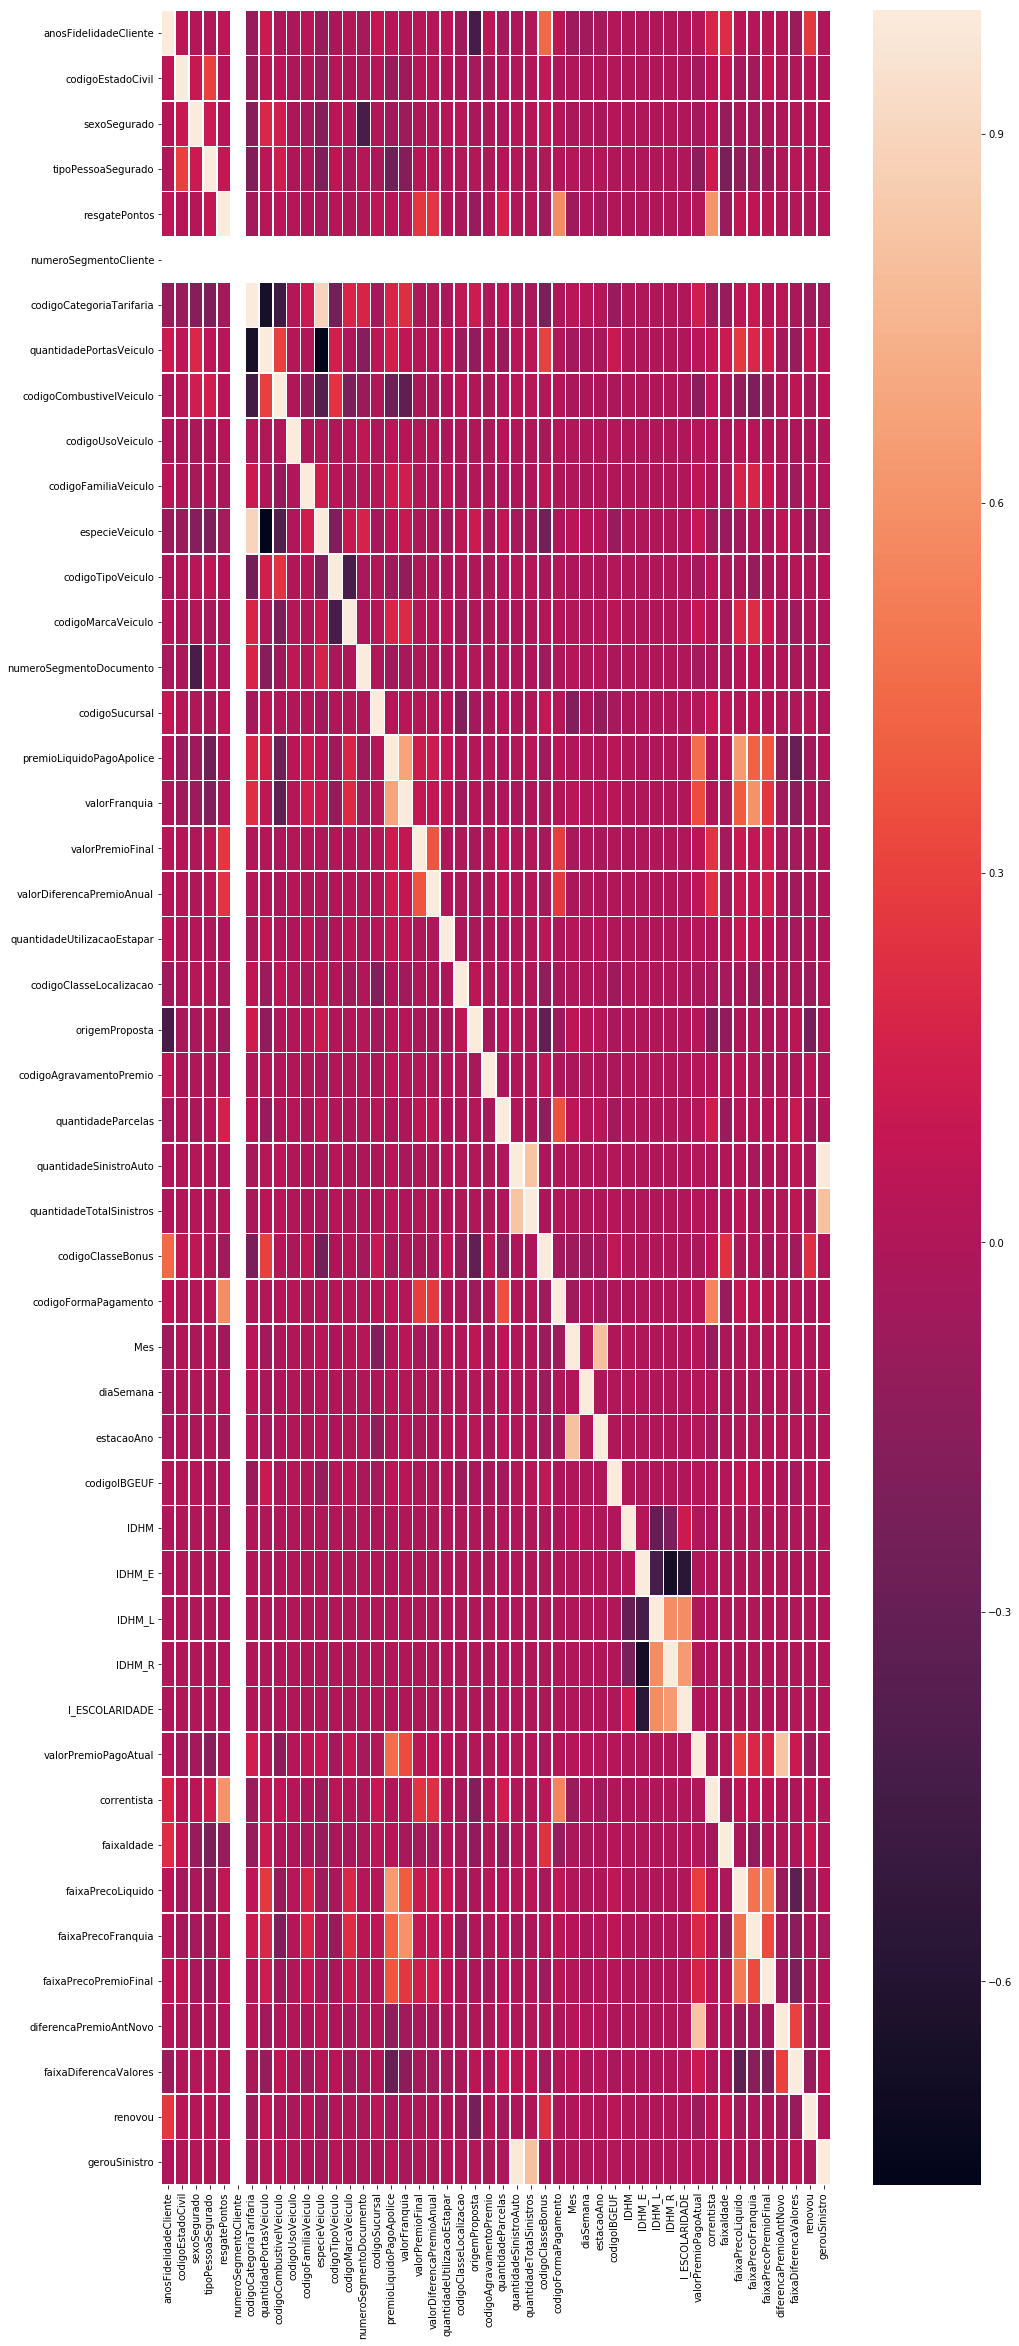

In [12]:
# Correlação em gráfico de HeatMap
f, ax = plt.subplots(figsize=(15, 40))
sns.heatmap(df.corr(method = 'pearson'),linewidths=.5, ax=ax)

In [13]:
# Correlação com a variável Target ordenado, feita a multiplicacao por 100 para melhor visualização
df.drop("renovou", axis=1).apply(lambda x: x.corr(df.renovou) * 100).sort_values()

origemProposta                -22.397376
faixaDiferencaValores         -10.140009
codigoClasseLocalizacao        -7.557477
valorPremioPagoAtual           -6.782029
especieVeiculo                 -6.421152
codigoCategoriaTarifaria       -6.406974
faixaPrecoLiquido              -5.721541
diferencaPremioAntNovo         -4.789050
premioLiquidoPagoApolice       -4.281904
quantidadeParcelas             -4.270177
faixaPrecoPremioFinal          -2.287753
numeroSegmentoDocumento        -2.245693
codigoUsoVeiculo               -1.692019
codigoCombustivelVeiculo       -1.378441
faixaPrecoFranquia             -1.040162
quantidadeSinistroAuto         -0.962291
codigoFormaPagamento           -0.851513
gerouSinistro                  -0.821628
quantidadeTotalSinistros       -0.807332
valorFranquia                  -0.765086
quantidadeUtilizacaoEstapar    -0.690578
resgatePontos                  -0.418242
IDHM_R                         -0.342850
estacaoAno                     -0.307310
codigoTipoVeicul

### Comentários: Pela análise de correlação, temos como principais fatores que influenciam no Churn as variáveis com valores maiores que 4 (positivo e negativo) abaixo: 

anosFidelidadeCliente, codigoClasseBonus, faixaIdade, quantidadePortasVeiculo, correntista, origemProposta,  faixaDiferencaValores, codigoClasseLocalizacao, valorPremioPagoAtual, especieVeiculo, codigoCategoriaTarifaria, faixaPrecoLiquido, diferencaPremioAntNovo e premioLiquidoPagoApolice

### Iremos utilizar a técnica de Features Selection para selecionar as melhores features para o Churn, pois é um método mais moderno e efetivo. 

In [14]:
# Tratamento de identificação de colunas com alta colinearidade. 
# Se a correlação de duas variáveis é maior de 0.90, é um indicativo de correlação forte entre elas. 
# Isso é um índicio de problema para o modelo preditivo. 
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Achando os indexes das colunas com correlação maior que 0.90
resultado = [column for column in upper.columns if any(upper[column] > 0.90)]
resultado

['gerouSinistro']

### Comentário: As variáveis 'valorDiferencaPremioAnual', 'IDHM_E', 'IDHM_L', 'I_ESCOLARIDADE' e 'gerouSinistro' apresentam alta colinearidade (Acima de 90%). Desta forma, serão descartadas na construção do modelo preditivo. 

# Criando o modelo Preditivo

In [15]:
# Retirando as variaveis problemáticas e com alta colinearidade através das análises acima. 
# Total de 8 colunas
df = df.drop(['valorDiferencaPremioAnual',
 'IDHM_E',
 'IDHM_L',
 'I_ESCOLARIDADE',
 'gerouSinistro',
'numeroSegmentoCliente',
'tipoPessoaSegurado',
'estacaoAno'], axis=1)

df.shape


(74570, 40)

In [16]:
df.columns

Index(['anosFidelidadeCliente', 'codigoEstadoCivil', 'sexoSegurado',
       'resgatePontos', 'codigoCategoriaTarifaria', 'quantidadePortasVeiculo',
       'codigoCombustivelVeiculo', 'codigoUsoVeiculo', 'codigoFamiliaVeiculo',
       'especieVeiculo', 'codigoTipoVeiculo', 'codigoMarcaVeiculo',
       'numeroSegmentoDocumento', 'codigoSucursal', 'premioLiquidoPagoApolice',
       'valorFranquia', 'valorPremioFinal', 'quantidadeUtilizacaoEstapar',
       'codigoClasseLocalizacao', 'origemProposta', 'codigoAgravamentoPremio',
       'quantidadeParcelas', 'quantidadeSinistroAuto',
       'quantidadeTotalSinistros', 'codigoClasseBonus', 'codigoFormaPagamento',
       'Mes', 'diaSemana', 'codigoIBGEUF', 'IDHM', 'IDHM_R',
       'valorPremioPagoAtual', 'correntista', 'faixaIdade',
       'faixaPrecoLiquido', 'faixaPrecoFranquia', 'faixaPrecoPremioFinal',
       'diferencaPremioAntNovo', 'faixaDiferencaValores', 'renovou'],
      dtype='object')

In [17]:
# Separandos os dados de predição e de target
array = df.values
X = array[:,0:39]
Y = array[:,39]

seed = 1313

### Normalizando e padronizando os dados do dataframe

In [18]:
# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

#Gerando padronização dos valores
scalerP = StandardScaler().fit(rescaledX)
standardX = scalerP.transform(rescaledX)

### Features Selection

In [19]:
# Seleção das melhores variáveis para construir o modelo pretidivo. Iremos utilizar o RandomForest para isso.

from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel

#Com Normalizacao e Padronizacao
clf_normalizado = RandomForestClassifier(random_state=seed)
selector_normalizado = clf_normalizado.fit(standardX, Y)
fs_normalizado = SelectFromModel(selector_normalizado, prefit=True)

#Dados não normalizados e padronizados
clf = RandomForestClassifier(random_state=seed)
selector = clf.fit(X, Y)
fs = SelectFromModel(selector, prefit=True)

standardX_new = fs.transform(X)
standardX_norm = fs_normalizado.transform(standardX)
standardX_new.shape


(74570, 10)

In [20]:
# Montando nova estrutura de dados com as colunas selecionadas
mask = fs.get_support()
colunas = df.columns
new_features = [] 
for bool, feature in zip(mask, colunas):
    if bool:
        new_features.append(feature)
        

df_selection = pd.DataFrame(standardX_new, columns=new_features)
df_selection['renovou'] = Y

df_selection_norm = pd.DataFrame(standardX_norm, columns=new_features)
df_selection_norm['renovou'] = Y

df_selection_norm.head(10)

,anosFidelidadeCliente,codigoSucursal,premioLiquidoPagoApolice,valorFranquia,valorPremioFinal,codigoClasseBonus,IDHM,IDHM_R,valorPremioPagoAtual,diferencaPremioAntNovo,renovou
0,1.130777,0.170723,0.226174,-0.092357,-0.222461,1.169820,1.003527,-0.902894,-0.041200,-0.191464,0.0
1,1.130777,-0.131435,-0.217892,0.205334,-0.220200,1.169820,1.003527,-0.902894,-0.041200,0.094450,0.0
2,1.130777,-0.131435,-0.217892,0.205334,-0.220200,1.169820,-0.929167,-0.902821,-0.041200,0.094450,0.0
3,1.328293,-0.131435,-0.016260,-0.868368,-0.223022,1.169820,-0.928896,1.237630,-0.049023,-0.044076,0.0
4,-0.054318,1.077198,-0.425752,0.061530,-0.220659,-0.883880,-0.929167,-0.902821,-0.291366,-0.050064,0.0
5,-0.449349,-0.811291,-0.477932,-0.218623,-0.220374,-1.140592,1.003527,-0.902894,-0.354881,-0.087137,0.0
6,-0.844381,-1.340067,-0.332907,-0.469402,-0.222213,1.169820,1.003527,-0.902894,-0.041200,0.168504,0.0
7,-0.844381,-0.131435,-0.681990,-0.810496,-0.221225,-1.397305,-0.929167,-0.902821,-0.041200,0.393263,0.0
8,-0.844381,1.039428,-0.341391,-0.605313,-0.220692,-1.397305,-0.928896,1.237630,-0.041200,0.173966,0.0
9,-0.646865,1.945902,0.991274,1.482026,-0.216794,1.169820,1.003527,-0.902894,2.241633,1.855901,0.0


In [21]:
# Separandos os dados predição e target
array = df_selection_norm.values
X = array[:,0:10]
Y = array[:,10]

array = df_selection.values
X_comum = array[:,0:10]
Y_comum = array[:,10]

X.shape, Y.shape


((74570, 10), (74570,))

# Criando os modelos

In [22]:
#!pip install tensorflow
#!pip install keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.


In [23]:
#Função de Construção do Modelo com Redes Neurais - KERAS

# Definindo os valores para o número de folds
num_folds = 10

#Criando a Rede Neural - 2 camadas
def build_model():
    model = Sequential()
    model.add(Dense(20, activation='relu', input_dim=10))
    model.add(Dropout(0.5))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

#Cross-Validation de Redes Neurais
def k_fold_train(model, x_train, y_train):
    kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=seed)
    k_fold_accuracies = []

    for k_train, k_test in kfold.split(x_train,y_train):
        history = model.fit(
            x_train[k_train],
            y_train[k_train],
            epochs=10,
            batch_size=20,
            verbose=0,
            validation_data=(x_train[k_test], y_train[k_test]))

        #Acuraria
        score = history.history['val_accuracy']
        k_fold_accuracies.append(score)

    return k_fold_accuracies



In [24]:
# Avaliação dos modelos e Considerações
def montarBoxPlot(resultados, nomes):

    sns.boxplot( y=nomes, x=resultados);
    plt.title('Comparação entre os Algoritmos')
    plt.show()    
    

In [25]:
def montarMatrixConfusion(y_test, y_pred, title): 
    
    cm = confusion_matrix(y_test, y_pred)
    print("\n Tabela - %s" % title)
    print(cm)
    print("\n")
    #sns.heatmap(cm, annot=True)
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
    plt.title(title)
    plt.show()
    
    #Curva ROC do modelo
    print("\n")
    montarCurveROC(y_test, y_pred, 'Curva ROC do Modelo')


In [26]:
def montarCurveROC(y_test, y_pred, title):
    
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    plt.title(title)
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('Falso Positivo')
    plt.ylabel('Verdadeiro Positivo')
    plt.show()



In [46]:
# Preparando a lista de modelos com Normalização e Padronização dos dados
def executar(X, Y, titulo, executaSVC): 
    modelos = []
    modelos.append(('LR', LogisticRegression()))
    modelos.append(('LDA', LinearDiscriminantAnalysis()))
    modelos.append(('NB', GaussianNB()))
    modelos.append(('KNN', KNeighborsClassifier()))
    modelos.append(('CART', DecisionTreeClassifier()))
    modelos.append(('EXTREE', ExtraTreesClassifier()))
    modelos.append(('SVC', OneVsRestClassifier(SVC(kernel='linear', probability=True, class_weight='balanced'))))
    modelos.append(('RAFOR', RandomForestClassifier(random_state=seed)))
    modelos.append(('LGB', LGBMClassifier(num_leaves=500, learning_rate=0.15, n_estimators=1000)))
    modelos.append(('XGB', XGBClassifier(n_estimators=150)))
    modelos.append(('KERAS', build_model()))

    # Avaliando cada modelo e exibindo os resultados
    resultados = []
    nomes = []

    kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)

    for nome, modelo in modelos:
        if nome != 'KERAS': 
            if nome == 'SVC':
                
                if executaSVC == True: 
                    # Gerando uma amostra menor ao modelo, devido ao tempo de processamento. 
                    X_treinoSVC, X_testeSVC, y_treinoSVC, y_testeSVC = train_test_split(X, Y, test_size = 0.95)

                    cv_results = cross_val_predict(modelo, X_treinoSVC, y_treinoSVC, cv = kfold)
                    cv_results_score = cross_val_score(modelo, X_treinoSVC, y_treinoSVC, cv = kfold, scoring = 'accuracy')

                    #Confusion Matrix
                    montarMatrixConfusion(y_treinoSVC, cv_results, titulo + " - Confusion Matrix - Modelo %s\n\n" % nome)
                    msg = "Modelo: %s => %.2f%s (Acuraria) - %s" % (nome, cv_results_score.mean() * 100, '%', titulo)

                else:
                    cv_results_score = [0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50]
                    msg = "Modelo: %s => %.2f%s (Acuraria) - %s" % (nome, 0.50 * 100, '%', titulo)
                    
            else:
                cv_results = cross_val_predict(modelo, X, Y, cv = kfold)
                cv_results_score = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
                
                #Confusion Matrix
                montarMatrixConfusion(Y, cv_results, titulo + " - Confusion Matrix - Modelo %s\n\n" % nome)
                msg = "Modelo: %s => %.2f%s (Acuraria) - %s" % (nome, cv_results_score.mean() * 100, '%', titulo)

                
            resultados.append(cv_results_score)
            nomes.append(nome)
        
        else:
            mean_acc = k_fold_train(modelo, X, Y)
            resultados.append(np.array(mean_acc[0]))
            nomes.append(nome)
            msg = "Modelo: %s => %.2f%s (Acuraria) - %s" % (nome, np.mean(mean_acc) * 100, '%', titulo)

        print("\n")
        print(msg)
            
    print("\n")
    print("\n")
    montarBoxPlot(resultados, nomes)
    return resultados


In [28]:
# Modelos com os dados Normalizados

In [29]:
# Devido ao tempo muito alto de processamento (mais de 4hrs, o SVC foi criado e treinado com poucos registros)


 Tabela - Modelo com dados Normalizados e Padronizados - Confusion Matrix - Modelo LR


[[26382 10908]
 [15623 21657]]




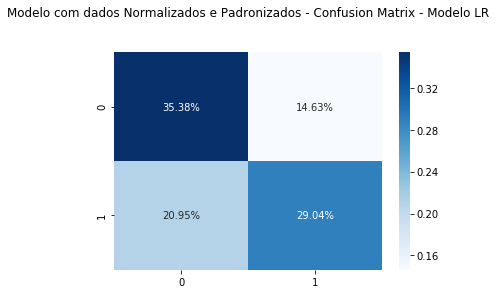

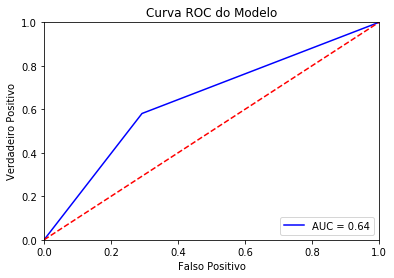



Modelo: LR => 64.42% (Acuraria) - Modelo com dados Normalizados e Padronizados

 Tabela - Modelo com dados Normalizados e Padronizados - Confusion Matrix - Modelo LDA


[[26309 10981]
 [15930 21350]]




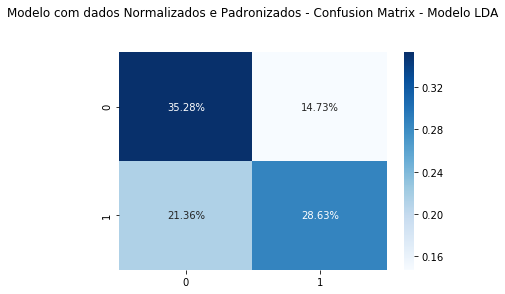

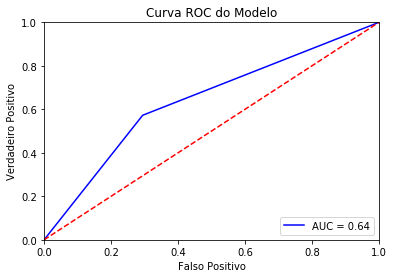



Modelo: LDA => 63.91% (Acuraria) - Modelo com dados Normalizados e Padronizados

 Tabela - Modelo com dados Normalizados e Padronizados - Confusion Matrix - Modelo NB


[[10337 26953]
 [ 2151 35129]]




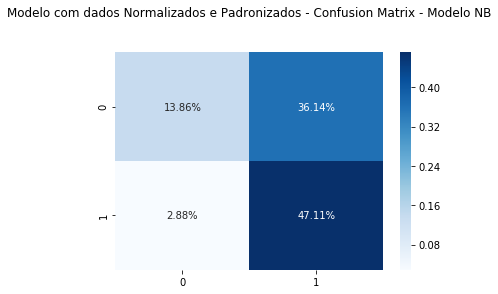

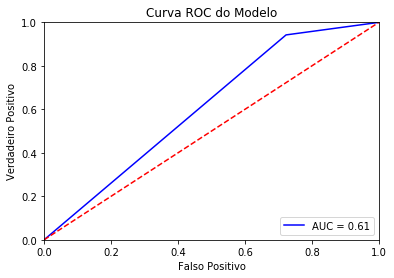



Modelo: NB => 60.97% (Acuraria) - Modelo com dados Normalizados e Padronizados

 Tabela - Modelo com dados Normalizados e Padronizados - Confusion Matrix - Modelo KNN


[[26833 10457]
 [ 7557 29723]]




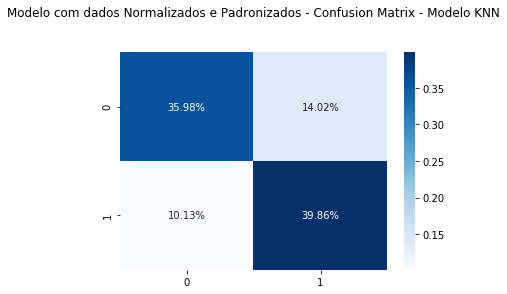

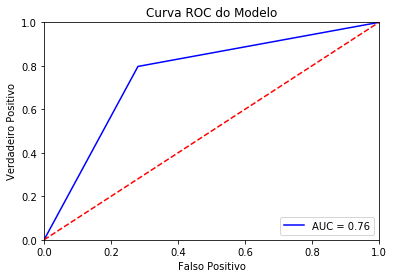



Modelo: KNN => 75.84% (Acuraria) - Modelo com dados Normalizados e Padronizados

 Tabela - Modelo com dados Normalizados e Padronizados - Confusion Matrix - Modelo CART


[[29954  7336]
 [ 8654 28626]]




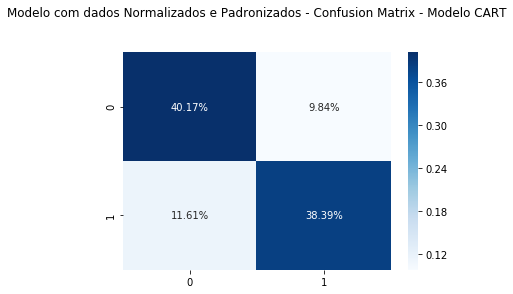

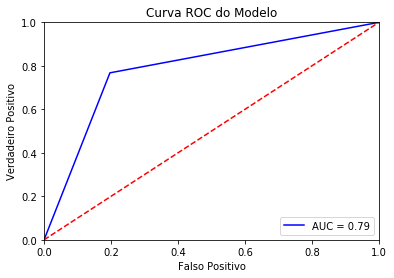



Modelo: CART => 78.60% (Acuraria) - Modelo com dados Normalizados e Padronizados

 Tabela - Modelo com dados Normalizados e Padronizados - Confusion Matrix - Modelo EXTREE


[[28941  8349]
 [ 7923 29357]]




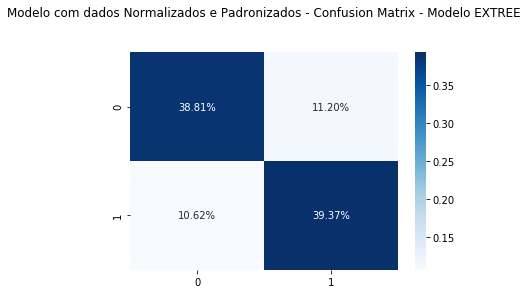

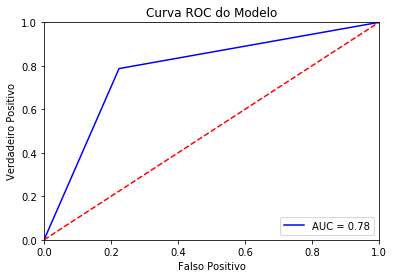



Modelo: EXTREE => 78.28% (Acuraria) - Modelo com dados Normalizados e Padronizados

 Tabela - Modelo com dados Normalizados e Padronizados - Confusion Matrix - Modelo SVC


[[1370  497]
 [ 846 1015]]




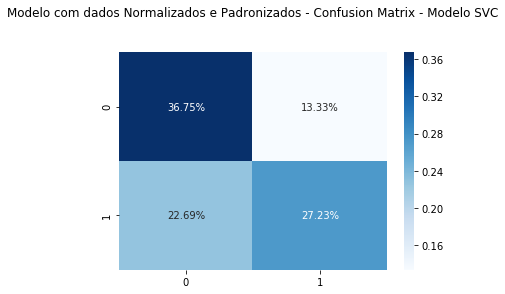

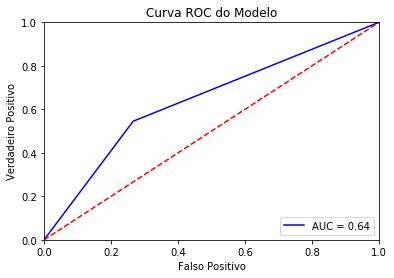



Modelo: SVC => 63.98% (Acuraria) - Modelo com dados Normalizados e Padronizados

 Tabela - Modelo com dados Normalizados e Padronizados - Confusion Matrix - Modelo RAFOR


[[29467  7823]
 [ 5982 31298]]




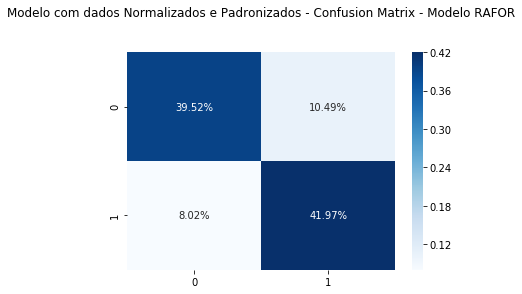

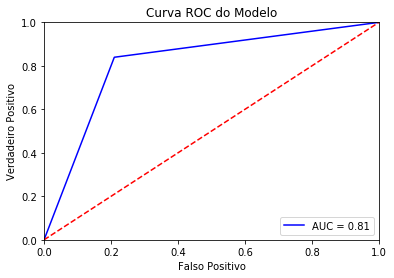



Modelo: RAFOR => 81.49% (Acuraria) - Modelo com dados Normalizados e Padronizados

 Tabela - Modelo com dados Normalizados e Padronizados - Confusion Matrix - Modelo LGB


[[29047  8243]
 [ 3640 33640]]




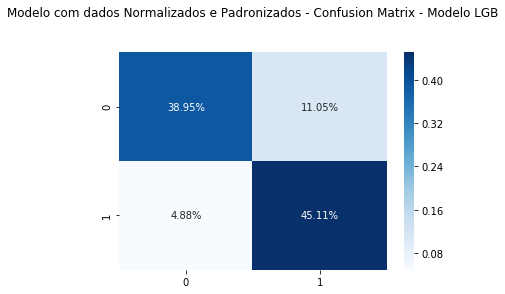

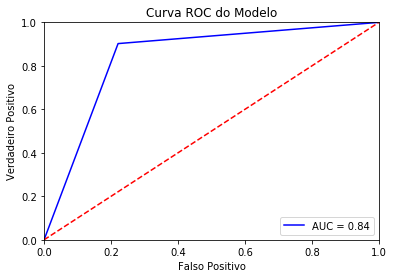



Modelo: LGB => 84.06% (Acuraria) - Modelo com dados Normalizados e Padronizados

 Tabela - Modelo com dados Normalizados e Padronizados - Confusion Matrix - Modelo XGB


[[28894  8396]
 [ 2231 35049]]




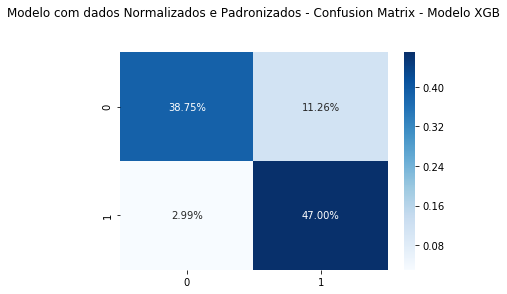

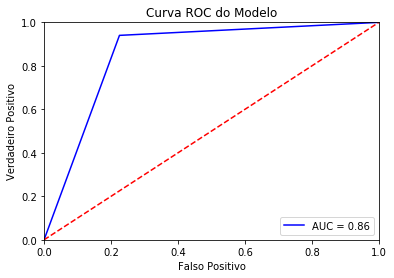



Modelo: XGB => 85.75% (Acuraria) - Modelo com dados Normalizados e Padronizados


Modelo: KERAS => 82.16% (Acuraria) - Modelo com dados Normalizados e Padronizados






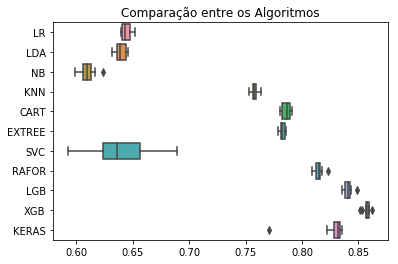

In [30]:
resultados = executar(X, Y, 'Modelo com dados Normalizados e Padronizados', True)

In [31]:
# Modelos com os dados comuns, sem tratamento


 Tabela - Modelo com dados sem tratamento - Confusion Matrix - Modelo LR


[[26313 10977]
 [15470 21810]]




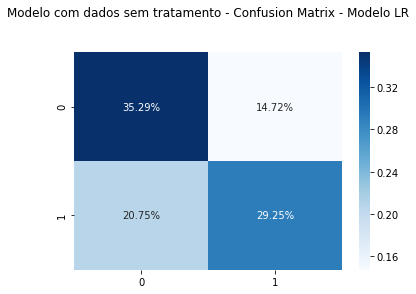

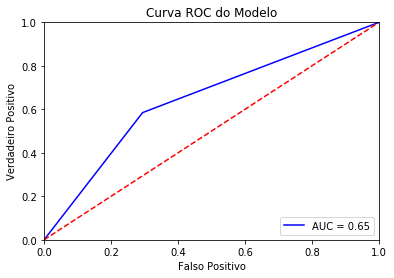



Modelo: LR => 64.53% (Acuraria) - Modelo com dados sem tratamento

 Tabela - Modelo com dados sem tratamento - Confusion Matrix - Modelo LDA


[[26309 10981]
 [15930 21350]]




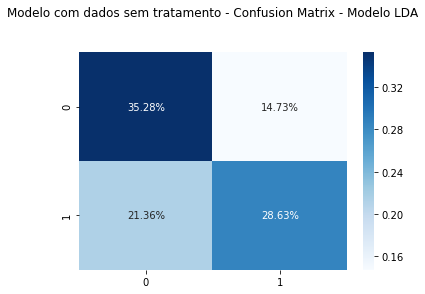

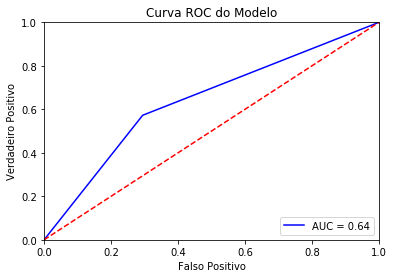



Modelo: LDA => 63.91% (Acuraria) - Modelo com dados sem tratamento

 Tabela - Modelo com dados sem tratamento - Confusion Matrix - Modelo NB


[[ 8814 28476]
 [ 2013 35267]]




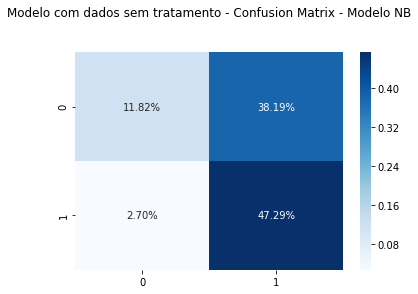

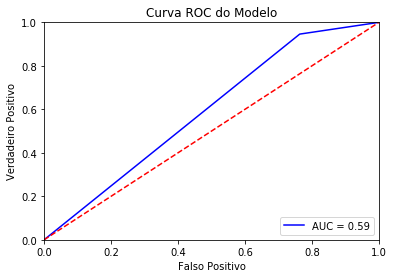



Modelo: NB => 59.11% (Acuraria) - Modelo com dados sem tratamento

 Tabela - Modelo com dados sem tratamento - Confusion Matrix - Modelo KNN


[[27357  9933]
 [ 7187 30093]]




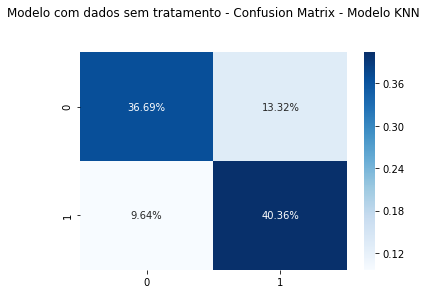

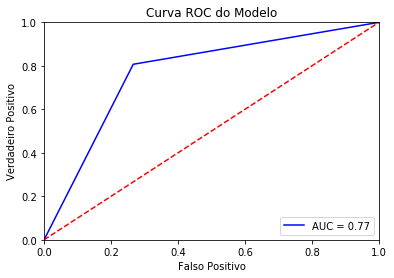



Modelo: KNN => 77.04% (Acuraria) - Modelo com dados sem tratamento

 Tabela - Modelo com dados sem tratamento - Confusion Matrix - Modelo CART


[[29959  7331]
 [ 8715 28565]]




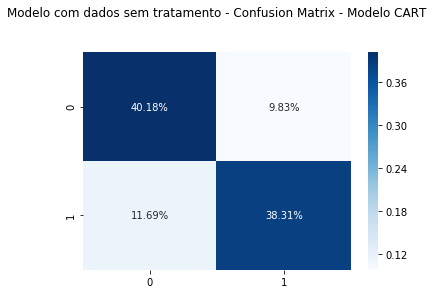

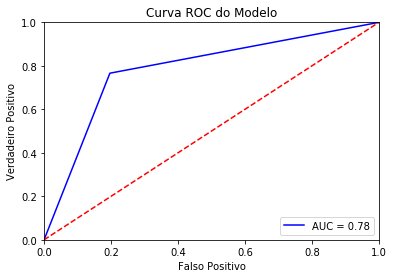



Modelo: CART => 78.54% (Acuraria) - Modelo com dados sem tratamento

 Tabela - Modelo com dados sem tratamento - Confusion Matrix - Modelo EXTREE


[[28861  8429]
 [ 7941 29339]]




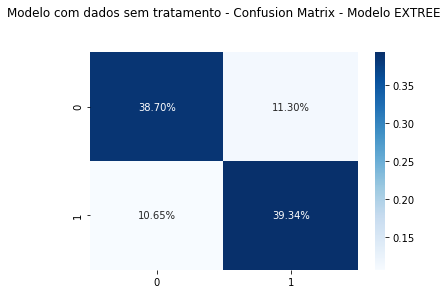

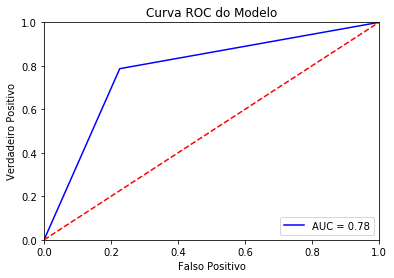



Modelo: EXTREE => 78.08% (Acuraria) - Modelo com dados sem tratamento


Modelo: SVC => 50.00% (Acuraria) - Modelo com dados sem tratamento

 Tabela - Modelo com dados sem tratamento - Confusion Matrix - Modelo RAFOR


[[29481  7809]
 [ 6077 31203]]




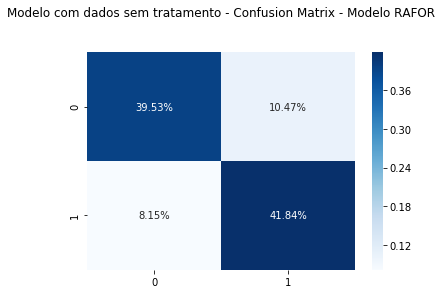

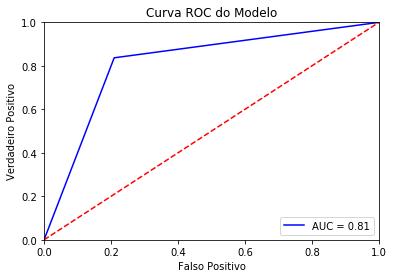



Modelo: RAFOR => 81.38% (Acuraria) - Modelo com dados sem tratamento

 Tabela - Modelo com dados sem tratamento - Confusion Matrix - Modelo LGB


[[29038  8252]
 [ 3600 33680]]




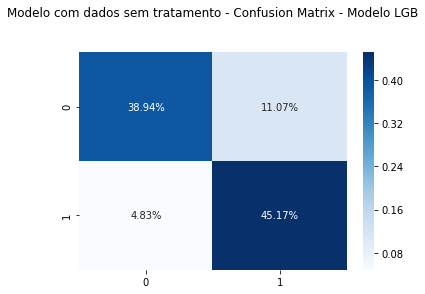

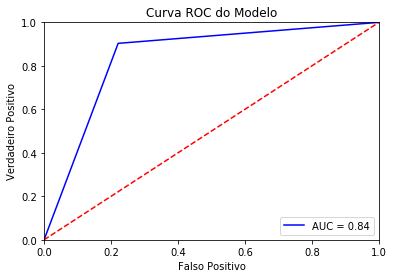



Modelo: LGB => 84.11% (Acuraria) - Modelo com dados sem tratamento

 Tabela - Modelo com dados sem tratamento - Confusion Matrix - Modelo XGB


[[28894  8396]
 [ 2231 35049]]




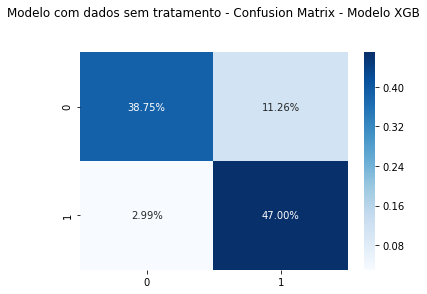

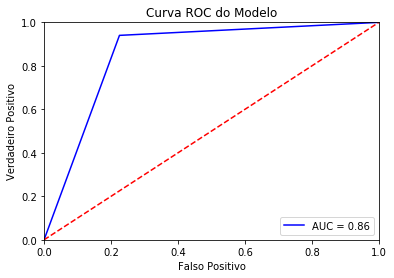



Modelo: XGB => 85.75% (Acuraria) - Modelo com dados sem tratamento


Modelo: KERAS => 63.19% (Acuraria) - Modelo com dados sem tratamento






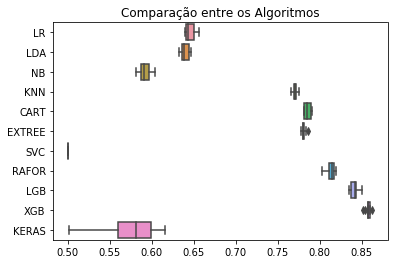

In [47]:
resultados1 = executar(X_comum, Y_comum, 'Modelo com dados sem tratamento', False)

## Comentário: Dados com Normalização tiveram melhor acurária em comparação com os não normalizados para a maioria dos algoritmos. O XGBClassifier apresenta o mesmo desempenho.

## Modelo Escolhido => XGBClassifier - Modo Normalizado e Padronizado

### Otimizando o Modelo para aumentar a acurácia. 

In [33]:
# Utilizando RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from scipy.stats import randint

modelo_inicial = XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(500, 1500),
              'learning_rate': stats.uniform(0.05, 0.20),
              'subsample': stats.uniform(0.1, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'min_child_weight': [1, 2, 3, 4]
             }

numFolds = 10
kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)

rsearch = RandomizedSearchCV(modelo_inicial, 
                         param_distributions = param_dist,
                         cv = kfold,  
                         n_iter = 5,
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

rsearch.fit(X, Y)

# Print dos resultados
print("Acurácia: %.2f" % (rsearch.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", rsearch.best_estimator_)


Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 22.0min finished


Acurácia: 91.01
Melhores Parâmetros do Modelo:
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.12221039053782455, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=None, n_estimators=744, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9244632953849392, verbosity=1)


In [34]:
#Gerando dados de Treino e de Teste para os modelos - 70% para o treino, 30% para Teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = 0.30)

X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((52199, 10), (22371, 10), (52199,), (22371,))

### Gerando o modelo final com a otimização

Modelo: XGB Final => 86.55% (Acuraria) - Modelo Otimizado

 Tabela - Confusion Matrix - Modelo XGB Final 


[[29031  8259]
 [ 1770 35510]]




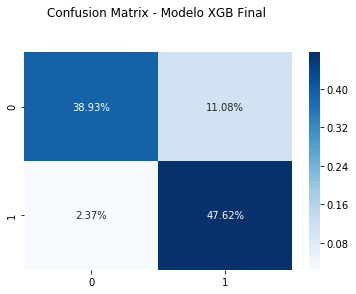

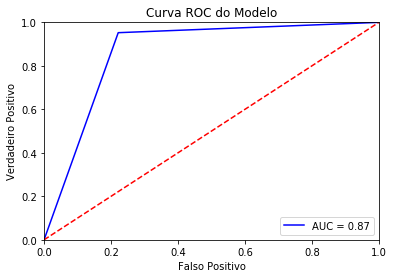

In [35]:
# Criando o modelo
modelo_xgb_final = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.11660371295014214, max_delta_step=0, max_depth=3,
              min_child_weight=2, missing=None, n_estimators=735, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6020533055981342, verbosity=1)

kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
cv_results = cross_val_predict(modelo_xgb_final, X, Y, cv = kfold)
cv_results_score = cross_val_score(modelo_xgb_final, X, Y, cv = kfold, scoring = 'accuracy')
print("Modelo: %s => %.2f%s (Acuraria) - %s" % ('XGB Final', cv_results_score.mean() * 100, '%', 'Modelo Otimizado'))

#Confusion Matrix
montarMatrixConfusion(Y, cv_results, "Confusion Matrix - Modelo XGB Final \n\n")


### Otimização manual, baseada em minha experiência 

In [36]:
modelo_xgb_final1 = XGBClassifier(base_score=0.7, booster='gbtree', learning_rate=0.11, n_estimators=750)

# Treinando o model
modelo_xgb_final1.fit(X_treino, y_treino)
# Fazendo previsões
y_pred_xgb = modelo_xgb_final1.predict(X_teste)
previsoes_xgb = [round(value) for value in y_pred_xgb]

# Avaliando as previsões
accuracy = accuracy_score(y_teste, previsoes_xgb)
print("Acurácia XGB Final - Otimização Manual: %.2f%%" % (accuracy * 100.0))



Acurácia XGB Final - Otimização Manual: 86.58%


In [37]:
# Salvando o modelo
joblib.dump(modelo_xgb_final1, 'modelo/modelo_xgb_final.joblib')
print("Modelo salvo!")

Modelo salvo!


### Previsões

Temos 10 casos reais num dataset separado para estimular e prever o Churn
O Objetivo desse trecho é demonstrar o algoritmo funcionando e mostrando os resultados de Churn Sim ou Não e a probabilidade disso. Conforme objetivos específicos desse TCC. 

In [38]:
#Load do modelo - Churn
modelo_churn = joblib.load('modelo/modelo_xgb_final.joblib')
modelo_churn

XGBClassifier(base_score=0.7, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.11, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, n_estimators=750, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [39]:
#Carregando o dataset - Predicao
df = pd.read_csv('dados/dataset_previsao.csv', sep=",")
df.head(10)

,anosFidelidadeCliente,codigoEstadoCivil,sexoSegurado,tipoPessoaSegurado,resgatePontos,numeroSegmentoCliente,codigoCategoriaTarifaria,quantidadePortasVeiculo,codigoCombustivelVeiculo,codigoUsoVeiculo,...,I_ESCOLARIDADE,valorPremioPagoAtual,correntista,faixaIdade,faixaPrecoLiquido,faixaPrecoFranquia,faixaPrecoPremioFinal,diferencaPremioAntNovo,faixaDiferencaValores,gerouSinistro
0,3,2,0,1,0,1,10,4,8,1,...,647.000,1300.18,0,2,2,2,2,76.61,2,0
1,5,2,0,1,0,1,23,5,2,1,...,365.000,6506.66,0,2,3,3,3,171.14,3,0
2,4,5,1,1,1,1,22,5,8,1,...,365.000,2120.00,1,2,3,3,1,-677.50,1,0
3,3,5,1,1,0,1,10,4,8,1,...,251.000,1643.34,1,2,2,2,2,-151.24,1,0
4,2,2,0,1,0,1,10,5,8,1,...,629.000,1217.53,0,2,2,2,2,-7.94,2,0
5,4,2,0,1,0,1,10,5,8,1,...,647.000,620.29,0,3,1,1,1,-123.64,1,0
6,0,2,0,1,0,1,10,4,2,1,...,0.487,897.45,0,3,1,3,2,-25.02,2,0
7,12,2,1,1,1,1,10,5,8,1,...,273.000,846.21,1,2,1,2,2,-47.01,2,0
8,2,1,1,1,0,1,10,3,8,1,...,326.000,833.20,0,2,1,2,1,-95.13,2,0
9,4,2,1,1,0,1,10,5,8,1,...,419.000,881.31,1,2,1,1,1,23.19,2,0


In [40]:
# Tratamento de Dados - Pré-Processamento do Modelo
df = df.drop(['valorDiferencaPremioAnual',
 'IDHM_E',
 'IDHM_L',
 'I_ESCOLARIDADE',
 'gerouSinistro',
'numeroSegmentoCliente',
'tipoPessoaSegurado',
'estacaoAno'], axis=1)

In [41]:
#Pegando as colunas no Features Selection
mask = fs.get_support()
colunas = df.columns
new_features = [] 
for bool, feature in zip(mask, colunas):
    if bool:
        new_features.append(feature)
        
df_selection = pd.DataFrame(df, columns=new_features)

# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(df_selection.values)

#Gerando padronização dos valores
scalerP = StandardScaler().fit(rescaledX)
standardX = scalerP.transform(rescaledX)

In [42]:
# Previsões
Y_churn_prob = modelo_churn.predict_proba(standardX)
Y_churn = modelo_churn.predict(standardX)


In [48]:
df_resultado = df_selection
df_resultado['Churn'] = Y_churn
df_resultado['Probabilidade_NoChurn'] = (Y_churn_prob[:,1] * 100)
df_resultado['Probabilidade_Churn'] = (Y_churn_prob[:,0] * 100)

df_resultado['Churn'] = ['Sim' if x == 0.0 else  'Nao' for x in df_resultado['Churn'] ]


In [49]:
df_resultado[['Churn','Probabilidade_NoChurn','Probabilidade_Churn']].head(10)

,Churn,Probabilidade_NoChurn,Probabilidade_Churn
0,Nao,55.099304,44.900696
1,Sim,19.033230,80.966774
2,Nao,79.348831,20.651167
3,Nao,84.593994,15.406007
4,Nao,72.657394,27.342606
5,Sim,43.794579,56.205421
6,Nao,88.420441,11.579561
7,Nao,90.939590,9.060407
8,Nao,87.992477,12.007523
9,Sim,49.968468,50.031532


In [45]:
#Salvando o trabalho
df_resultado[['Churn','Probabilidade_NoChurn','Probabilidade_Churn']].to_excel('resultado/resultado.xlsx', header=True, index=False, engine='openpyxl')

## FIM
## OBRIGADO